# Imports

In [1]:
import pathlib

# install additional packages if running on Emscripten
import platform

import matplotlib
import pandas as pd
import seaborn as sns

sns.set_style("ticks", {"axes.grid": True})

In [2]:
notebook_platform = platform.uname()
if notebook_platform.system == "Emscripten":
    import piplite

    await piplite.install("openpyxl")

# Data

In [3]:
this_file = pathlib.Path().absolute()
data_dir = this_file.parent / "data"
data_dir

WindowsPath('c:/Users/Legion/workspace/tld_let_calibration/data')

In [4]:
from enum import Enum

radiation = Enum("rad_type", "proton Co60")
detector = Enum("detector", "mcp mts")

In [5]:
df_calib_mts_Co60 = pd.read_excel(
    data_dir / "interim" / "Wyniki_DK_IFJ.xlsx",
    sheet_name="ifj_calib_mts",
    usecols="A,H",
    names=["filename", "signal"],
    dtype={"filename": "string", "signal": "float"},
)

# drop rows with NaNs
df_calib_mts_Co60.dropna(axis=0, how="all", inplace=True, subset="signal")
df_calib_mts_Co60.insert(loc=0, column="detector", value=detector.mts.name)
df_calib_mts_Co60.insert(loc=1, column="rad_type", value=radiation.Co60.name)
df_calib_mts_Co60.insert(
    loc=2,
    column="det_id",
    value=df_calib_mts_Co60.filename.apply(
        lambda x: x.split("_")[0].rstrip("b")
    ).astype("int"),
)
df_calib_mts_Co60.sort_values(by=["det_id"], inplace=True)
df_calib_mts_Co60

,detector,rad_type,det_id,filename,signal
81,mts,Co60,1,1_3.dat,93918561.0
80,mts,Co60,2,2_4.dat,90247006.5
79,mts,Co60,3,3_5.dat,87735642.5
78,mts,Co60,4,4_6.dat,89243865.0
77,mts,Co60,5,5_7.dat,88309182.5
...,...,...,...,...,...
6,mts,Co60,66,66_74.dat,82567018.0
4,mts,Co60,67,67_75.dat,80914325.0
3,mts,Co60,68,68_76.dat,83688043.0
2,mts,Co60,69,69_77.dat,82952002.0


In [6]:
df_calib_mts_proton = pd.read_excel(
    data_dir / "interim" / "Wyniki_DK_IFJ.xlsx",
    sheet_name="ifj_calib_mts",
    usecols="L,S",
    names=["filename", "signal"],
)

df_calib_mts_proton.dropna(axis=0, how="all", inplace=True, subset="signal")
df_calib_mts_proton.insert(loc=0, column="detector", value=detector.mts.name)
df_calib_mts_proton.insert(loc=1, column="rad_type", value=radiation.proton.name)
df_calib_mts_proton.insert(
    loc=2,
    column="det_id",
    value=df_calib_mts_proton.filename.apply(
        lambda x: x.split("_")[0].rstrip("b")
    ).astype("int"),
)
df_calib_mts_proton.sort_values(by=["det_id"], inplace=True)
df_calib_mts_proton

,detector,rad_type,det_id,filename,signal
81,mts,proton,1,1_4.dat,91539262.5
80,mts,proton,2,2_5.dat,89185626.5
78,mts,proton,4,4_7.dat,86729537.5
77,mts,proton,5,5_8.dat,89078415.0
76,mts,proton,6,6_9.dat,87348743.0
...,...,...,...,...,...
6,mts,proton,66,66_77.dat,83243857.5
4,mts,proton,67,67b_81.dat,80129301.0
3,mts,proton,68,68b_82.dat,80933306.5
2,mts,proton,69,69b_83.dat,81610396.0


In [7]:
df_calib_mcp_Co60 = pd.read_excel(
    data_dir / "interim" / "Wyniki_DK_IFJ.xlsx",
    sheet_name="ifj_calib_mcp",
    usecols="A,H",
    names=["filename", "signal"],
)

# drop rows with NaNs
df_calib_mcp_Co60.dropna(axis=0, how="all", inplace=True, subset="signal")
df_calib_mcp_Co60.insert(loc=0, column="detector", value=detector.mcp.name)
df_calib_mcp_Co60.insert(loc=1, column="rad_type", value=radiation.Co60.name)
df_calib_mcp_Co60.insert(
    loc=2,
    column="det_id",
    value=df_calib_mcp_Co60.filename.apply(
        lambda x: x.split("_")[0].rstrip("b")
    ).astype("int"),
)
df_calib_mcp_Co60.sort_values(by=["det_id"], inplace=True)
df_calib_mcp_Co60

,detector,rad_type,det_id,filename,signal
81,mcp,Co60,1,1_5.dat,1.307468e+09
80,mcp,Co60,2,2_6.dat,1.236975e+09
79,mcp,Co60,3,3_7.dat,1.290799e+09
78,mcp,Co60,4,4_8.dat,1.288080e+09
77,mcp,Co60,5,5_9.dat,1.290176e+09
...,...,...,...,...,...
6,mcp,Co60,66,66_76.dat,1.263693e+09
4,mcp,Co60,67,67_77.dat,1.257025e+09
3,mcp,Co60,68,68_78.dat,1.241656e+09
2,mcp,Co60,69,69_79.dat,1.138491e+09


In [8]:
df_calib_mcp_proton = pd.read_excel(
    data_dir / "interim" / "Wyniki_DK_IFJ.xlsx",
    sheet_name="ifj_calib_mcp",
    usecols="M,T",
    names=["filename", "signal"],
)

df_calib_mcp_proton.dropna(axis=0, how="all", inplace=True, subset="signal")
df_calib_mcp_proton.insert(loc=0, column="detector", value=detector.mcp.name)
df_calib_mcp_proton.insert(loc=1, column="rad_type", value=radiation.proton.name)
df_calib_mcp_proton.insert(
    loc=2,
    column="det_id",
    value=df_calib_mcp_proton.filename.apply(
        lambda x: x.split("_")[0].rstrip("b")
    ).astype("int"),
)
df_calib_mcp_proton.sort_values(by=["det_id"], inplace=True)
df_calib_mcp_proton

,detector,rad_type,det_id,filename,signal
81,mcp,proton,1,1_4.dat,1.083712e+09
80,mcp,proton,2,2_5.dat,1.037160e+09
79,mcp,proton,3,3_6.dat,1.088858e+09
78,mcp,proton,4,4_7.dat,1.084600e+09
77,mcp,proton,5,5_8.dat,1.090357e+09
...,...,...,...,...,...
6,mcp,proton,66,66_75.dat,5.920298e+08
4,mcp,proton,67,67_76.dat,5.653947e+08
3,mcp,proton,68,68_77.dat,5.642166e+08
2,mcp,proton,69,69_78.dat,5.248804e+08


<Axes: title={'center': 'Integral vs. detector id'}, xlabel='det_id', ylabel='signal'>

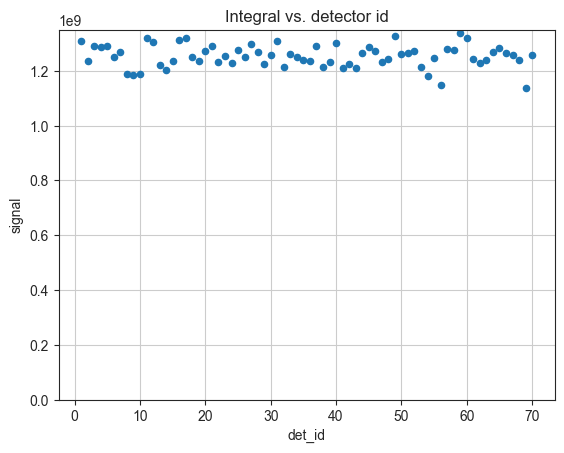

In [9]:
df_calib_mcp_Co60.plot(
    x="det_id",
    y="signal",
    kind="scatter",
    grid=True,
    title="Integral vs. detector id",
    ylim=(0, None),
)

## merging the dataframes

In [10]:
df_calib = pd.concat(
    [df_calib_mcp_Co60, df_calib_mcp_proton, df_calib_mts_Co60, df_calib_mts_proton]
)
df_calib.detector = df_calib.detector.astype("category")
df_calib.rad_type = df_calib.rad_type.astype("category")
df_calib.filename = df_calib.filename
df_calib

,detector,rad_type,det_id,filename,signal
81,mcp,Co60,1,1_5.dat,1.307468e+09
80,mcp,Co60,2,2_6.dat,1.236975e+09
79,mcp,Co60,3,3_7.dat,1.290799e+09
78,mcp,Co60,4,4_8.dat,1.288080e+09
77,mcp,Co60,5,5_9.dat,1.290176e+09
...,...,...,...,...,...
6,mts,proton,66,66_77.dat,8.324386e+07
4,mts,proton,67,67b_81.dat,8.012930e+07
3,mts,proton,68,68b_82.dat,8.093331e+07
2,mts,proton,69,69b_83.dat,8.161040e+07


In [11]:
df_calib.dtypes

detector    category
rad_type    category
det_id         int32
filename      object
signal       float64
dtype: object

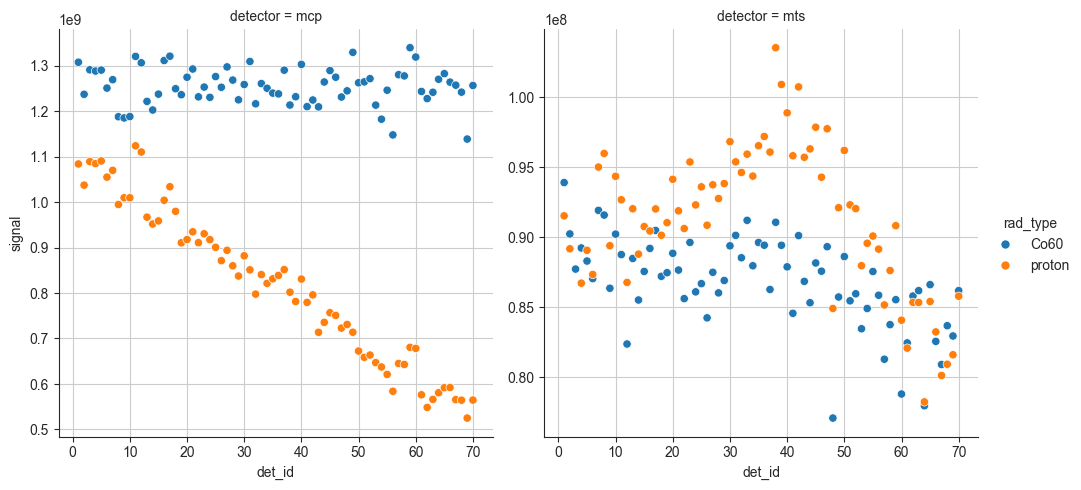

In [12]:
sns.relplot(
    data=df_calib,
    x="det_id",
    y="signal",
    hue="rad_type",
    col="detector",
    kind="scatter",
    facet_kws=dict(sharex=True, sharey=False),
)

In [13]:
df_calib["eff"] = float("nan")
for name, df in df_calib.groupby(["detector", "det_id"]):
    eff = (
        df[df.rad_type == radiation.proton.name].signal
        / df[df.rad_type == radiation.Co60.name].signal
    )
    df_calib.loc[
        (df_calib.det_id == name[1])
        & (df_calib.detector == name[0])
        & (df_calib.rad_type == radiation.proton.name),
        "eff",
    ] = eff

C:\Users\Legion\AppData\Local\Temp\ipykernel_16012\2432590704.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for name, df in df_calib.groupby(["detector", "det_id"]):


In [14]:
df_calib

,detector,rad_type,det_id,filename,signal,eff
81,mcp,Co60,1,1_5.dat,1.307468e+09,NaN
80,mcp,Co60,2,2_6.dat,1.236975e+09,NaN
79,mcp,Co60,3,3_7.dat,1.290799e+09,NaN
78,mcp,Co60,4,4_8.dat,1.288080e+09,NaN
77,mcp,Co60,5,5_9.dat,1.290176e+09,NaN
...,...,...,...,...,...,...
6,mts,proton,66,66_77.dat,8.324386e+07,1.008197
4,mts,proton,67,67b_81.dat,8.012930e+07,0.990298
3,mts,proton,68,68b_82.dat,8.093331e+07,0.967083
2,mts,proton,69,69b_83.dat,8.161040e+07,0.983827


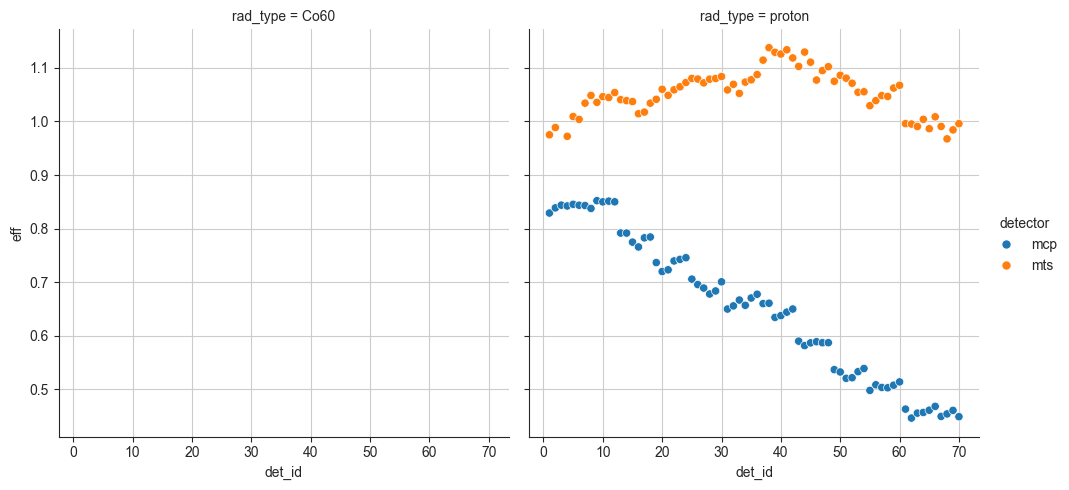

In [15]:
sns.relplot(
    data=df_calib[df_calib.rad_type == radiation.proton.name],
    x="det_id",
    y="eff",
    hue="detector",
    col="rad_type",
    kind="scatter",
    facet_kws=dict(sharex=True, sharey=True),
)

In [16]:
df_calib.to_hdf(
    data_dir / "interim" / "signal.h5", key="calib", mode="w", format="table"
)